# Stock Data - Exploratory Analysis

In this notebook, we will use pandas_datareader's DataReader function to obtain stock data from yahoo for a couple of tech companies. With this data, we will perform some exploratory data analysis to look into some metrics and see if we can find any relationships or find any trends.

In [2]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from datetime import datetime

The companies that we will look at are Apple, Google, Microsoft, and Amazon. We will be getting data from yahoo for the past 1 year (I am writing this as of January 2nd 2020, so the past year will refer to Jan 2019 - Jan 2020). 

In [3]:
# company codes for the aforementioned companies
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [4]:
# settign start and end dates

end = datetime(2020,1,2)
start = datetime(end.year-1,end.month,end.day)

In [5]:
# iterate through the list and create separate DataFrame for each company
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end) # sets stocker ticker name as variable name for related df

## Initial inspection of data

Now that we've extracted our data, let's see what they look like. Since we made our DataFrame variable names their ticker IDs, we can call the DataFrames by their ID:

In [6]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,155.582367
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,140.085220
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,146.065353
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.740265
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.518509


In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,210.190475,206.623083,208.218379,208.619960,2.805379e+07,207.385434
std,34.886894,34.690984,34.752292,34.953256,1.080884e+07,35.608053
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220
25%,188.000000,183.740005,185.220001,186.119995,2.099050e+07,184.463242
50%,204.940002,201.630005,203.160004,203.130005,2.588170e+07,201.854736
75%,226.419998,222.860001,224.800003,223.970001,3.204650e+07,223.299591
max,300.600006,295.190002,296.239990,300.350006,9.131220e+07,300.350006


In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-01-02 to 2020-01-02
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


(A small thing to note, in the our describe() call, it says there are 253 values, but the info() call says that there are 251 non-null values. This means that we have some null values in our DataFrame.)

# Insights from Visualizing data

Since our data is chronological, it only maeks sense that we plot it to observe how certain metrics changed over time. We will specifically plot the stock price and volume traded:

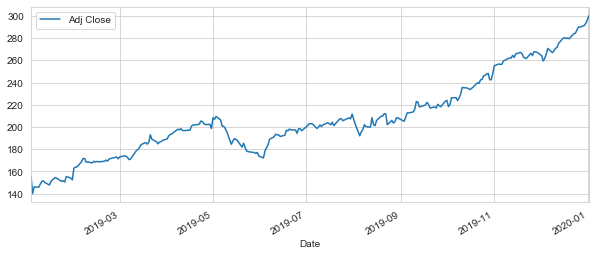

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

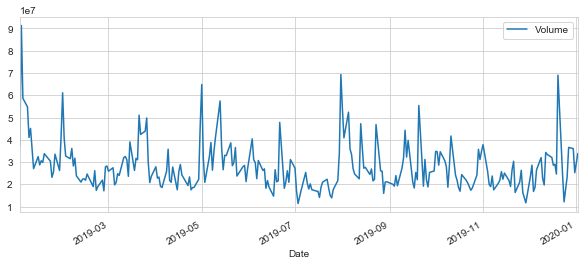

In [10]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Looking at our first plot, we can see that Apple's stock has been performing pretty well over the last year, with one major hiccup occuring between May and June. Looking at news from aroudn that time, it would seem that the drop was attributed to the escalating trade war between China and the U.S.

(For the second plot, the scale is in e-notation, so every unit increase on the y-axis corresponds to 10 million units being traded)

The graph for apple's stock looks pretty tame, so it's easy to identify trends and major turning points, but in the event that our data was more turbulent, we could apply a Moving Average to capture the performance trend for a period of time. For example's sake, let's apply a moving average to Apple's stock and graph it. We will plot it for three different periods (10 days, 20 days, 50 days) to show the smoothing effect.

(Note: I realize that applying a 50-day moving average to data for 365 days is a bit silly, but it's more for emphasizing a point mroe than anything)

In [11]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean() # rolling_mean has been deprecated? Use this instead.

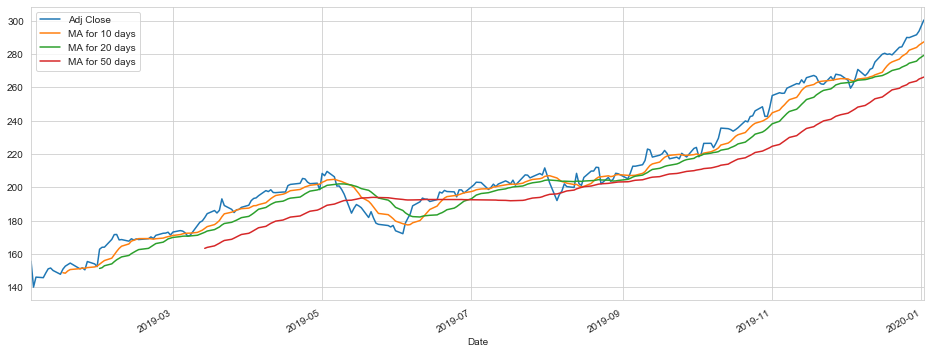

In [12]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(16,6))

As we can see from this plot, the larger the Moving Average (MA) period is, the smoother the curve will be when we plot it. A bit of warning here, is that since a 50-day MA is really large relative to our data size, it won't be as sensitive to major changes that happen in a shorter time. Evidence of this is how the curve smooths out in the May-June period, versus how the 10-day and 20-day MA capture the dip (10-day MA a bit better than 20-day). If anything, this is a good exercise to demonstrate how to choose a proper period for our MA (we need to see which period best captures the movement of the stock).

There are other metrics we can use to assess the performance of Apple's stock. One such metric is the percent change in value. We will create a new column in the AAPL DataFrame called 'Daily Return', where we will list the daily percent change of the stock.

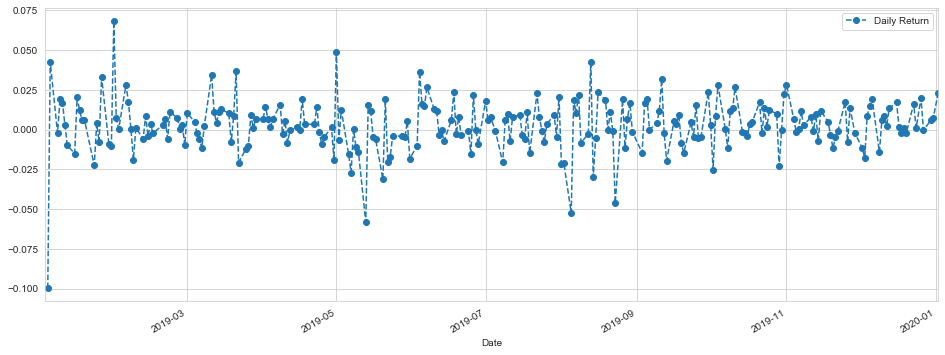

In [13]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(16,6),legend=True,linestyle='--',marker='o')

This too looks very turbulent. Another way we can visualize this data is a distplot, which will show a graphical representation of our distribution, as well as a histogram. Since we have a lot of values, we will divide the data into 100 bins to get a more accurate represnetation of our distribution:

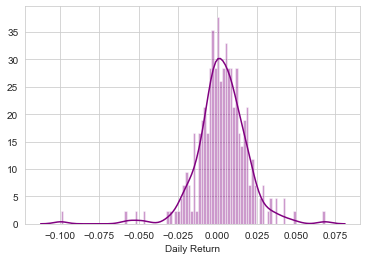

In [14]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Additionally, if you don't care for the graphical part of a distplot, we can always use a more traditional histogram:

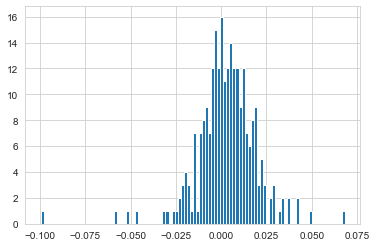

In [15]:
AAPL['Daily Return'].hist(bins=100)

It looks like the data is distrubated around 0, which makes sense since stock prices fluctuate up and down all the time.

## Visualizing Stock relations

We did say earlier that we would look at four companies, so we will do so in this section. We will take the closing prices for the stock of the four aforementioned companies and looking at some interesting interactions between them.

In [16]:
# aggregate 'Adj Close' columns for all 4 companies into a single dataframe
df_closing = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [17]:
df_closing.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-02,155.582367,1045.849976,99.646614,1539.130005
2019-01-03,140.085220,1016.059998,95.980820,1500.280029
2019-01-04,146.065353,1070.709961,100.444817,1575.390015
2019-01-07,145.740265,1068.390015,100.572922,1629.510010
2019-01-08,148.518509,1076.280029,101.302139,1656.579956


Similarly to what we did with Apple's stock Dataframe earlier, we will calculate the daily percentage changes in stock value for each company and create a separate DataFrame for it.

In [18]:
tech_rets = df_closing.pct_change()

In [19]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.028484,-0.036788,-0.025242
2019-01-04,0.042689,0.053786,0.046509,0.050064
2019-01-07,-0.002226,-0.002167,0.001275,0.034353
2019-01-08,0.019063,0.007385,0.007251,0.016612


As we can see, the first row is null because for Jan 2nd, there is no prior data point for which it can calculate the percentage change. For most of the following plots, this row shouldn't give us too much trouble, but we will have to account for it later.

Before, we used a distplot/histogram to show the distribution of Apple's percentage change. We can actually plot two distributions simultaneously and see if there is any relationship between their distributions. For this, we will use a jointplot and specify the center of the plot to be a scatterplot. For example's sake, we will plot Google against itself to show what a perfectly correlated plot would look like:

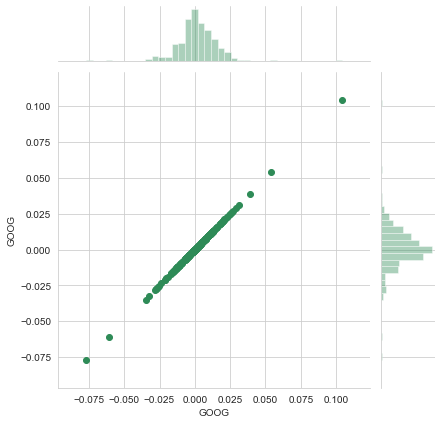

In [20]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

Since Google's stock is perfectly correlated with itself, the scatterplot will just be a straight line. A neat feature is that you can see the histograms plotted on the top and right edges of the graph (with their respective values on the oppostie side of the graph).

Let's graph Google vs Microsoft and see what we can find:

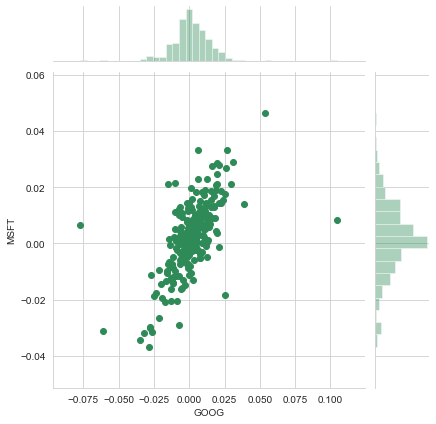

In [21]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

While we don't have a perfect correlation, the data still imply that there is some relationship between the percentage changes of Google and Microsoft's stocks. This is not uncommon to see for comapneis that exist in the same industry. We can also use the pairplot function to plot all the columns of the DataFrame against one another.  we will, however, have to remove null values to do this, as to avoid errors in the code:

In [22]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.028484,-0.036788,-0.025242
2019-01-04,0.042689,0.053786,0.046509,0.050064
2019-01-07,-0.002226,-0.002167,0.001275,0.034353
2019-01-08,0.019063,0.007385,0.007251,0.016612


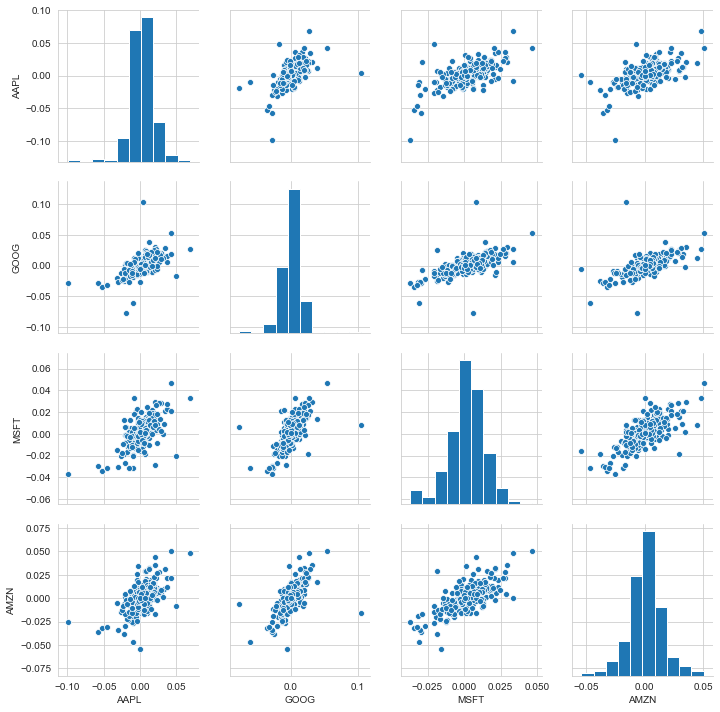

In [23]:
sns.pairplot(tech_rets.dropna())

As we saw with Microsoft and Google's stocks, the scatterplots are shaped as if there is some sort of relationship between the companies' performances. Also, as you may have noticed, for the cases where a company is plotted against itself, we see a histogram isntead of a scatterplot (which I honestly prefer).

We can go one step beyond pairplot and use seaborn's PairGrid() function. This will allow us more freedom to customize what we see on our grid. Let's keep scatterplots on the upper triangle of graphs, but we will change the color of the point to purple. Next, we will change the lower triangle graphs to be kde plots. Lastly, we will keep the diagonal graphs to be histograms, but we will change the number of bins to 30.

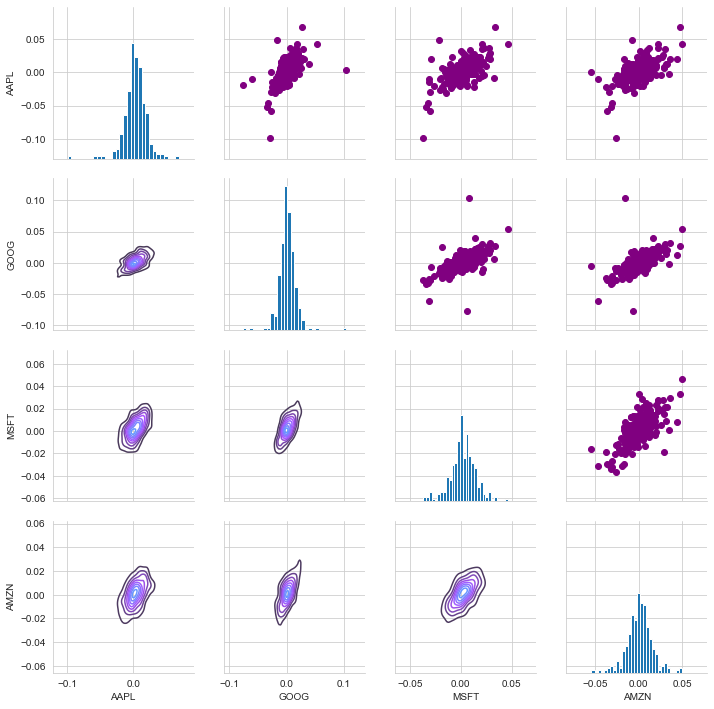

In [24]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Let's apply a PairGrid to the data in our earlier dataframe (the one that had the raw valeus of Adj Closing):

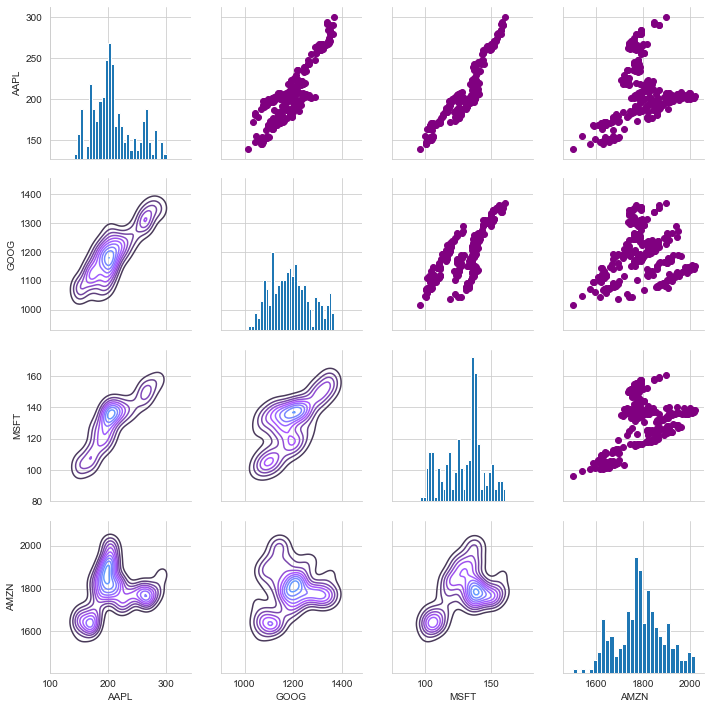

In [25]:
returns_fig = sns.PairGrid(df_closing)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

In this plot we can see a non-insignificant relationship between Apple's stock price with both Microsoft and Google. If we really wanted to explroe their relationship further, we can use a correlation heatmap. We calculate the correlations between the columns of our DataFrame using the .corr() method. We will then call seaborn's heatmap function to display the output:

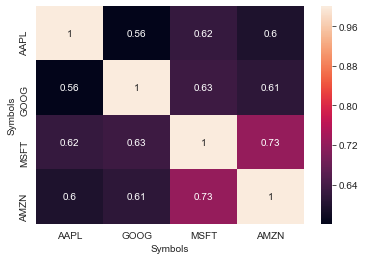

In [35]:
# corrplot is no longer part of seaborn, so instead we calcualte the correlation matrix using pandas .corr()
# then we use that matrix as our input in sns.heatmap()
corr = tech_rets.corr()

sns.heatmap(corr,annot=True)

Looking at the correlation heatmap for our returns dataframe, we see that the comapnies do have some level of correlation with each other, the strognest being between Microsoft and Amazon. Let's apply the same process to our DataFrame with the closing values:

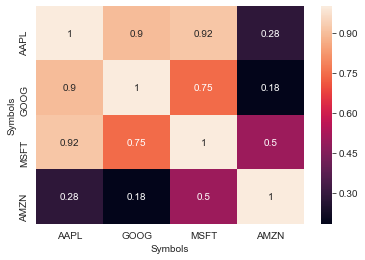

In [36]:
# same thing for the other dataframe

corr = df_closing.corr()

sns.heatmap(corr,annot=True)

In this correlation heatmap, we see some numerical evidence to our Gridplot above. The correlations for with apple with both microsoft and google ar 0.9 or above, which is pretty significant. Another notable relation is between Google and Microsoft (which doesn't seem too farfetched since they both highly correlate with Apple).

## Implementing Basic VAR

A common topic in finance is Value At Risk (VAR). it gives us an idea of how risky or how lucractive a stock is by caluclating the expected return and plotting it against the standard deviation. Let's try and implement this:

In [40]:
df_rets = tech_rets.dropna()

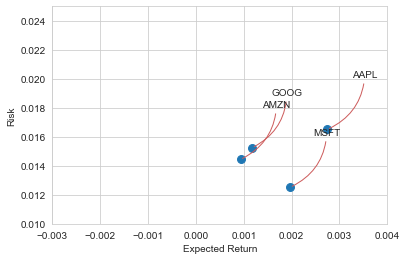

In [41]:
area = np.pi*20

plt.scatter(df_rets.mean(),df_rets.std(),s=area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(df_rets.columns,df_rets.mean(),df_rets.std()):
     plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color='indianred'))

Here, we can see the various risk vs returns for our companies. Someone notable points are that Microsoft has relatively low risk and high return compared to the other three companies. Apple, on the other hand has both the highest risk and highest return. Let's look into Apple's stock frurther. We will use a distplot to show the distribution of daily return for Apple:

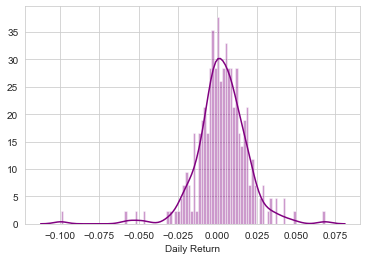

In [42]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

We can see that most of the data are distributed around zero, but there is some activity happening a little further out on the negative side. This would probably explain why the standard deviation is higher than the other comapnies. We can use quantiles to calculate our value of risk for Apple's Stock:

In [45]:
df_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-03,-0.099607,-0.028484,-0.036788,-0.025242
2019-01-04,0.042689,0.053786,0.046509,0.050064
2019-01-07,-0.002226,-0.002167,0.001275,0.034353
2019-01-08,0.019063,0.007385,0.007251,0.016612
2019-01-09,0.016982,-0.001505,0.014300,0.001714


In [46]:
df_rets['AAPL'].quantile(0.05)

-0.020656430977620002

What this means is that we have 95% confidnece that at worst, our daily loss will be 2-2.1%. This means that if we had 1 million dollars invested, that our VAR would be between 20,000-21,000 dollars. We could also use a Monte-Carlo method to achieve something similar.

## Implementing a Monte Carlo Method

Monte Carlo simulations are a pretty popular method of understanding risk and uncertainty. I won't get into the details or formulas here, as there are plenty of resources available online. What we will do, however, is implement a motne carlo simulation with Google's stock price and see what insights we can gain. First, we need to implement the formulas programatically and wrap them in a function for us to use for some number of iterations: 

In [47]:
days = 365

dt = 1/days

mu = df_rets.mean()['GOOG']

sigma = df_rets.std()['GOOG']

In [48]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [49]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976
2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998
2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961
2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015
2019-01-08,1084.560059,1060.530029,1076.109985,1076.280029,1764900,1076.280029


Now that we've set up our function, let's choose an arbitrary start price, and run our simulation for 100 iterations. We will plot our results and see if there's anythign significant we can observe:

(Note: in real applications, the methods are far more compelx and run for a much, much higher number of iterations. This example provides some insight on how to set up the problem and attempt to implemetn a solution)

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

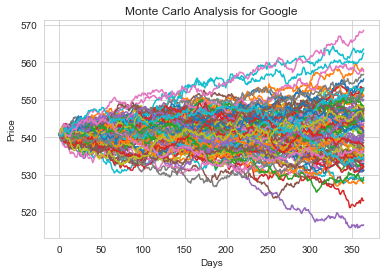

In [50]:
start_price = 540.74

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

It's hard to tell anything from this graph, as there's no clear indication of any deterministic behavior. Let's try running the simulation for 10,000 iterations and apply some statistical analysis of the results:

In [51]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

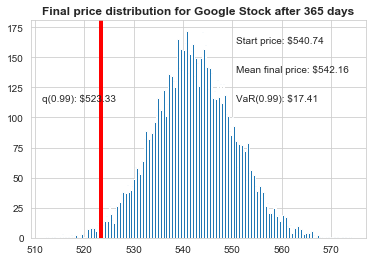

In [52]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting price
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price - q))

# Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

# Plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

#Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')


What these restults tell us about the simulation is that the mean final price of all the simulations is slightly higher than our starting price, which is generally a good thing. The VaR(0.99) value tells us that with 99% certainty, our value at risk per stock is 17.41 USD. This means that with 99% certainty, we can say that the worst value Google's stock will reach after a year is 523.33 USD (which is 17.41 lower than our starting price, hence our VAR).

### Takeaways

While we did do a lot of work in this notebook, there are a few caveats to mention:
 - Real stock analysis/VaR analysis is a much more complex process and what we did in this notebook is more an expose of sorts on what tools we can use for our analysis
 - The data we have may not be able to explain all the phenomena we saw earlier, and thus making claims on insights may not be accurate conclusions
 
 
But for the sake of practice there are more ways we can explroe the data that we didn't do yet in the notebook:
 - We can run this same methodology (basic VaR and Monte Carlo) on the other 3 stocks to see if there's any insight we can draw from them
 - We can use pandas' datareader to find stock from companies in unrelated fields and see if we can find any connection between them